In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.interpolate import RBFInterpolator
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

class RBFRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, kernel=None, smoothing=None):
        self.kernel = kernel
        self.smoothing = smoothing
        
    def fit(self, X, y):
        self.rbf = RBFInterpolator(
            X, y, kernel=self.kernel, smoothing=self.smoothing)
        return self
    
    def predict(self, X):
        return self.rbf(X)

/Users/jrekoske/opt/anaconda3/envs/general/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('reg',
                 RBFRegressor(kernel='quintic', smoothing=2.154434690031882))])


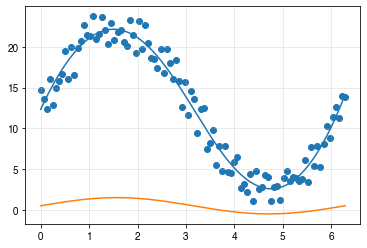

In [102]:
n = 100
X = np.linspace(0, 2*np.pi, n).reshape(-1, 1)
y = 10 + 10 * (np.sin(X)[:,0] + 0.5 * np.random.rand(n))

pipe = Pipeline(steps=[('scaler', StandardScaler()), ('reg', RBFRegressor())])
params_grid = [{
    'reg': [RBFRegressor()],
    'reg__kernel': ['thin_plate_spline', 'cubic', 'quintic'],
    'reg__smoothing': np.logspace(-3, 3, 10)}, {
    'reg': [MLPRegressor(learning_rate='adaptive', max_iter=5000)],
    'reg__hidden_layer_sizes': [(10, 10), (20, 20)]}]

search = GridSearchCV(pipe, params_grid)
search.fit(X, y)
print(search.best_estimator_)

Xpred = np.linspace(0, 2*np.pi, 1000).reshape(-1, 1)
ypred = search.predict(Xpred)
ytrue = np.sin(Xpred) + 0.5

plt.scatter(X, y)
plt.plot(Xpred, ypred)
plt.plot(Xpred, ytrue)
plt.plot()
plt.show()

In [101]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg,param_reg__kernel,param_reg__smoothing,param_reg__hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054452,0.021616,0.004021,0.000280,"RBFRegressor(kernel='quintic', smoothing=10.0)",thin_plate_spline,0.001,NaN,"{'reg': RBFRegressor(kernel='quintic', smoothi...",-4.715144,-0.178494,0.840963,0.363896,-6.362274,-2.010210,2.945433,24
1,0.019219,0.003221,0.003899,0.000124,"RBFRegressor(kernel='quintic', smoothing=10.0)",thin_plate_spline,0.004642,NaN,"{'reg': RBFRegressor(kernel='quintic', smoothi...",-3.324900,0.280960,0.851077,0.109767,-2.825637,-0.981747,1.734092,20
2,0.017013,0.003000,0.003657,0.000328,"RBFRegressor(kernel='quintic', smoothing=10.0)",thin_plate_spline,0.021544,NaN,"{'reg': RBFRegressor(kernel='quintic', smoothi...",-2.893462,0.335095,0.848170,0.079732,-1.597996,-0.645692,1.391342,14
3,0.016923,0.001061,0.003708,0.000149,"RBFRegressor(kernel='quintic', smoothing=10.0)",thin_plate_spline,0.1,NaN,"{'reg': RBFRegressor(kernel='quintic', smoothi...",-2.802656,0.316280,0.842869,0.217418,-1.400328,-0.565283,1.347279,13
4,0.015170,0.001128,0.003660,0.000161,"RBFRegressor(kernel='quintic', smoothing=10.0)",thin_plate_spline,0.464159,NaN,"{'reg': RBFRegressor(kernel='quintic', smoothi...",-3.019483,0.290717,0.848729,0.279717,-1.653156,-0.650695,1.457140,15
5,0.016313,0.002732,0.003645,0.000175,"RBFRegressor(kernel='quintic', smoothing=10.0)",thin_plate_spline,2.154435,NaN,"{'reg': RBFRegressor(kernel='quintic', smoothi...",-3.684033,0.194400,0.855913,0.199622,-2.426983,-0.972216,1.763324,19
6,0.030449,0.010456,0.004228,0.000400,"RBFRegressor(kernel='quintic', smoothing=10.0)",thin_plate_spline,10.0,NaN,"{'reg': RBFRegressor(kernel='quintic', smoothi...",-5.003701,-0.364435,0.856738,-0.475846,-3.887831,-1.775015,2.257968,23
7,0.019603,0.003885,0.003950,0.000329,"RBFRegressor(kernel='quintic', smoothing=10.0)",thin_plate_spline,46.415888,NaN,"{'reg': RBFRegressor(kernel='quintic', smoothi...",-7.170723,-3.279044,0.824189,-4.131704,-6.158061,-3.983069,2.775579,26
8,0.016595,0.000561,0.003690,0.000211,"RBFRegressor(kernel='quintic', smoothing=10.0)",thin_plate_spline,215.443469,NaN,"{'reg': RBFRegressor(kernel='quintic', smoothi...",-8.190495,-9.155366,0.672755,-11.490432,-7.286537,-7.090015,4.126490,29
9,0.016344,0.000811,0.003762,0.000152,"RBFRegressor(kernel='quintic', smoothing=10.0)",thin_plate_spline,1000.0,NaN,"{'reg': RBFRegressor(kernel='quintic', smoothi...",-6.165428,-12.626439,0.520865,-15.774962,-5.492310,-7.907655,5.728362,30
